In [2]:
# !pip install lxml
from movie_reviews import Review
from stemmer import Stemmer

import json
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [3]:
stemmer = Stemmer("root_dict.json")

In [4]:
f = open("reviews_dict.json", "r")
json_reviews = json.loads(f.read())
f.close()

In [5]:
reviews = []

for review in json_reviews:
    reviews.append(Review.from_json(json_reviews[review]))

In [12]:
stop_list = ['.', ',', '"', ')', '(', ':', ';', '?', '!', '\'', '–', '-', '{', '{', '\xa0']

for i, review in enumerate(reviews):
    reviews[i].text = review.text[:review.text.find('waitingModule.runWhenReady')]
    temp = review.text.lower()

    for element in stop_list:
        temp = temp.replace(element, " ")
        
    for j in range(10):
        temp = temp.replace("  ", " ")

    temp = temp.split(" ")
    stemmed_text = ""
    for word in temp:
        found = stemmer.find(word) 
        if found:
            stemmed_text += found.replace(" ","") #sometimes word has space in the end
        else:
            stemmed_text += word
        stemmed_text += " "
    reviews[i].text = stemmed_text

print(reviews[0].text)

od premier pierwszy zombielandu minąć dziesięć rok w tym czas przez popkultura przeszły prawdziwy fala produkcje o zombi od film i serial przez książki po marsz zombi w miasto na cały świecie zombi pojawiać się w taki pozorny pasować do żywy trup gatunek jak komedia romantyczny film wieczny żywy a nawet w świecie z proza jane austen duma i uprzedzić i zombi abigail breslin jesse eisenberg emma stone wood harrelson ctmg inca móc się wydawać że wszystek nasycić się motyw zombi ten jednak jak to żywy trup on przestawać kroczyć przez kultura w tym kino po truposz on umierać jim jarmusch mieść w polski kin kolejny film o zombi drug część zombielandu kulki w łeb czy film na tło pierwszy część oraz cały korpus produkcje o zombi z ostatni dekada wnosić cokolwiek nowy świeży zaskakujący lubić innowacyjny z cały pewność on jednak jak na odgrzewać kotlet z garmażerka który już dawny powinien my się znudzić smakować całkiem znośny a czas nawet smaczny jesse eisenberg wood harrelson ctmg inca dział

In [86]:

# import pandas as pd

In [144]:
X = [review.text for review in reviews]
y = [int(review.rating) for review in reviews]
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape, X_test.shape)

# df = pd.DataFrame()
# df['text'] = X_train
# df['rating'] = y_train


df.head()



(174,) (58,)


,text,rating
0,mijać dekada a w głowa james gray wciąż mieszk...,7
1,bartosz konopka to jeden z najciekawszy polski...,6
2,być w sługa wojna taki ujęcie kamera zdejmować...,4
3,w swój drug pełny metraż kantemir balagov po r...,7
4,owca dolly były w 1996 al w 1995 być ty mówić...,3


In [145]:
vectorizer = CountVectorizer()
X_matrix = vectorizer.fit_transform(X_train)

In [249]:
# print(len(vectorizer.get_feature_names()), len(corpus))


d = np.array([[1,2,3], [2,3,4]])
print(d)
d[0, :] = d[0, :] * 3
print(d)

# vec1 = np.array([[1,2,4]])
# vec2 = np.array([[1,2,4]])
# np.divide(vec1, vec2)

[[1 2 3]
 [2 3 4]]
[[3 6 9]
 [2 3 4]]


In [281]:
#
# print(X_matrix.shape)
# row_sum = np.sum(X_matrix, axis=1)
# row_multiplier = np.array(np.multiply(y_train.reshape(-1,1), 1/row_sum))
# # print(row_multiplier.shape, row_multiplier)
# X_matrix_mul = X_matrix.copy().astype(np.float)
# print(X_matrix_mul.shape, X_matrix.shape)
# for row in range(X_matrix.shape[0]):
# #     print(np.array(row_multiplier)[0])
# #     print((X_matrix[row, :] * row_multiplier[row][0]).shape)
# #     print(X_matrix_mul[row, :].shape, X_matrix[row, :].shape, row_multiplier[row][0])
#     X_matrix_mul[row, :] = X_matrix[row, :] * row_multiplier[row][0]

# # X_matrix_mul = np.multiply(X_matrix.T, y_train).T
# print(X_matrix)
# print(X_matrix_mul.shape)
# # print(row_multiplier)
# print(np.sum(X_matrix_mul))
# print(X_matrix_mul)
# print(X_matrix[0])
for i, column in enumerate(X_matrix.toarray()):
#     pass
    summary_col += (np.array(column) * int(y_train[i]))

print(summary_row[500:510])
# print(summary_row.shape)

ValueError: non-broadcastable output operand with shape (174,1) doesn't match the broadcast shape (174,15157)

In [18]:
temp_arr = X.toarray()
for i, _ in enumerate(summary_row):
    summary_row[i] /= sum(temp_arr[:, i])
print(summary_row[500:510])
# vectorizer.get_feature_names()[1140]


[4.         5.         7.         7.         7.         7.
 7.         7.         3.33333333 7.        ]


In [19]:
# our_grade

for j, review in enumerate(X.toarray()[200:]):
    grade = 0
    counter = 0
    for i, element in enumerate(review):

        if element != 0:
            grade += summary_row[i]
            counter += 1
#         print(gr)
        
    print(reviews[j].title, reviews[j].rating, grade/counter)
#         print(summary_row[vectorizer.vocabulary_.get(word)], word, vectorizer.vocabulary_.get(word))
#     print(grade)

In [56]:
grades_guessed = []
for review in reviews:
    grade = 0
    counter = 0
    for word in review.text.split(" "):
        index = vectorizer.vocabulary_.get(word)
        
        if index:
#             print(index, summary_row[index])
            grade += summary_row[index]
            counter += 1
    
    grades_guessed.append(grade/counter)
#     print(review.title, review.rating, grade/counter + 5)

In [57]:
y = []
for review in reviews:
    y.append(int(review.rating))

In [58]:
print(np.sum(y)/len(y))

5.745689655172414


In [59]:
from sklearn.linear_model import LinearRegression

grades_guessed = np.array(grades_guessed).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

print(grades_guessed)
clf = LinearRegression()
clf.fit(grades_guessed, y)

[[5.5849824 ]
 [5.97118097]
 [5.16164893]
 [6.06326028]
 [5.42625516]
 [5.61922667]
 [5.17640114]
 [6.19327585]
 [5.11015575]
 [6.03972952]
 [6.2818067 ]
 [6.19807999]
 [5.71772477]
 [6.25120525]
 [6.00836827]
 [5.945432  ]
 [5.96450426]
 [5.65488498]
 [5.42123858]
 [5.93864895]
 [5.76772343]
 [6.06054228]
 [5.92700796]
 [5.95259178]
 [6.08384556]
 [5.29005182]
 [5.15528903]
 [5.12842388]
 [5.2126689 ]
 [5.2679115 ]
 [5.57179601]
 [5.16331174]
 [5.82655046]
 [5.79721063]
 [5.18777821]
 [6.03274543]
 [6.23064202]
 [6.03622554]
 [6.22678338]
 [6.26674952]
 [6.12115378]
 [6.01394225]
 [5.96568238]
 [5.63563954]
 [5.5899735 ]
 [5.23131318]
 [5.63993861]
 [5.14319553]
 [5.08349368]
 [6.11464867]
 [6.28336175]
 [5.26998339]
 [5.41130616]
 [5.53059547]
 [6.05518546]
 [5.96140266]
 [5.83576499]
 [5.99210445]
 [6.0165181 ]
 [6.19992654]
 [5.83889412]
 [6.21552833]
 [6.07150508]
 [6.09301361]
 [5.0360485 ]
 [5.18053895]
 [5.62981518]
 [6.45783385]
 [5.62066132]
 [5.8010854 ]
 [5.88458215]
 [6.19

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
clf.score(grades_guessed, y)

0.8761215738015546

In [80]:
predicted = np.round(clf.predict(grades_guessed))
from sklearn.metrics import r2_score
r2_score(predicted, y)

0.8500394632991318

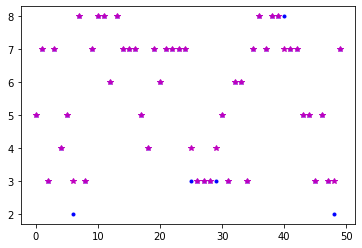

In [81]:
import matplotlib.pyplot as plt


plt.plot(y[:50], 'b.')
plt.plot(predicted[:50], 'm*')

In [241]:
data = ["ala ma kota w zielonym domku", "olek ma kota w czerwonym domku"]
vec2 = CountVectorizer()
z = vec2.fit_transform(data)

In [261]:
# print(z.toarray())
all_rows = np.zeros(z.toarray().shape[1])
mark = [7, 3]
multiplied_matrix = z.toarray()
for i, row in enumerate(multiplied_matrix):
    multiplied_matrix[i, :] = multiplied_matrix[i, :] * mark[i] 
    all_rows += row



for column in range(multiplied_matrix.shape[1]):
    col_avg = sum(multiplied_matrix[:, column]) / sum(z.toarray()[:, column])
    col_min = min([el for el in multiplied_matrix[:, column] if el > 0])
#     print(col_min)
    col_max = max(multiplied_matrix[:, column])
    if abs(col_avg - col_min) > 1 or abs(col_avg - col_max) > 1:
        all_rows[column] = 0
    
#     if (max(multiplied_matrix[:, column]) - (multiplied_matrix[:, column])) > 3:
#         print(max(multiplied_matrix[:, column]))
#         all_rows[i] = 0
#     print(column)
print(multiplied_matrix)
print(all_rows)    

[[7 0 7 7 7 0 7]
 [0 3 3 3 3 3 0]]
[7. 3. 0. 0. 0. 3. 7.]


In [226]:
print(all_rows)

[ 7.  3. 10. 10. 10.  3.  7.]


In [228]:
temp = z.toarray()
for i in range(temp.shape[1]):
    all_rows[i] /= sum(temp[:, i])

In [229]:
print(all_rows)

[7. 3. 5. 5. 5. 3. 7.]


In [231]:
for word in data[0].split(" "):
    print(word)

ala
ma
kota
w
zielonym
domku
